In [2]:
from google.cloud import aiplatform

In [3]:
# Option 1: If you have a service account key file, uncomment and update the path:
# import os
# os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/path/to/your/service-account-key.json"

# Option 2: If running in Google Colab or need interactive auth:
# from google.colab import auth
# auth.authenticate_user()

aiplatform.init(
    project="project-4ee4d468-669a-42ea-b5f",
    location='us-east4'
)

In [4]:
dataset = aiplatform.TabularDataset(
    dataset_name='projects/project-4ee4d468-669a-42ea-b5f/locations/us-east4/datasets/6978349612843139072'
)

In [5]:
dataset.column_names

['PEG_trailing',
 'cash_debt',
 'npm',
 'inv_turn',
 'sale_invcap',
 'capital_ratio',
 'opmad',
 'debt_capital',
 'int_totdebt',
 'intcov',
 'curr_debt',
 'GProf',
 'cash_lt',
 'dltt_be',
 'opmbd',
 'gpm',
 'ptpm',
 'aftret_invcapx',
 'short_debt',
 'debt_assets',
 'cash_conversion',
 'pe_inc',
 'pay_turn',
 'fcf_ocf',
 'pe_exi',
 'debt_at',
 'CAPEI',
 'profit_lct',
 'roe',
 'lt_debt',
 'efftax',
 'sale_equity',
 'invt_act',
 'staff_sale',
 'outlook',
 'intcov_ratio',
 'cfm',
 'totdebt_invcap',
 'quick_ratio',
 'roce',
 'ps',
 'ptb',
 'divyield',
 'aftret_equity',
 'aftret_eq',
 'sale_nwc',
 'de_ratio',
 'at_turn',
 'debt_ebitda',
 'accrual',
 'bm',
 'pcf',
 'int_debt',
 'cash_ratio',
 'pretret_earnat',
 'Prior_Rating_Ordinal',
 'adv_sale',
 'lt_ppent',
 'prioroutlook',
 'rect_act',
 'ratingdate',
 'equity_invcap',
 'pretret_noa',
 'debt_invcap',
 'pe_op_dil',
 'roa',
 'dpr',
 'curr_ratio',
 'Rating_Ordinal',
 'pe_op_basic',
 'rect_turn',
 'rd_sale',
 'ocf_lct',
 'evm']

In [6]:
column_specs = aiplatform.training_jobs.AutoMLTabularTrainingJob.get_auto_column_specs(
    dataset=dataset,
    target_column='Rating_Ordinal',
)

In [7]:
# Check if ratingsymbol exists in the dataset
column_names = dataset.column_names
print("Columns in dataset:")
for col in column_names:
    print(f"  - {col}")

print(f"\n'ratingsymbol' in dataset: {'ratingsymbol' in column_names}")

Columns in dataset:
  - PEG_trailing
  - cash_debt
  - npm
  - inv_turn
  - sale_invcap
  - capital_ratio
  - opmad
  - debt_capital
  - int_totdebt
  - intcov
  - curr_debt
  - GProf
  - cash_lt
  - dltt_be
  - opmbd
  - gpm
  - ptpm
  - aftret_invcapx
  - short_debt
  - debt_assets
  - cash_conversion
  - pe_inc
  - pay_turn
  - fcf_ocf
  - pe_exi
  - debt_at
  - CAPEI
  - profit_lct
  - roe
  - lt_debt
  - efftax
  - sale_equity
  - invt_act
  - staff_sale
  - outlook
  - intcov_ratio
  - cfm
  - totdebt_invcap
  - quick_ratio
  - roce
  - ps
  - ptb
  - divyield
  - aftret_equity
  - aftret_eq
  - sale_nwc
  - de_ratio
  - at_turn
  - debt_ebitda
  - accrual
  - bm
  - pcf
  - int_debt
  - cash_ratio
  - pretret_earnat
  - Prior_Rating_Ordinal
  - adv_sale
  - lt_ppent
  - prioroutlook
  - rect_act
  - ratingdate
  - equity_invcap
  - pretret_noa
  - debt_invcap
  - pe_op_dil
  - roa
  - dpr
  - curr_ratio
  - Rating_Ordinal
  - pe_op_basic
  - rect_turn
  - rd_sale
  - ocf_lct
  -

## Train Model

In [8]:
display_name = 'credit-rating-automl-model-v2'
optimization_prediction_type = 'classification'
optimization_objective = 'minimize-log-loss'

In [9]:
job = aiplatform.AutoMLTabularTrainingJob(
    display_name=display_name,
    optimization_prediction_type=optimization_prediction_type,
    optimization_objective=optimization_objective,
    column_specs=column_specs,
    project="project-4ee4d468-669a-42ea-b5f",
    location='us-east4',
)

In [10]:
model = job.run(
    dataset=dataset,
    target_column='Rating_Ordinal',
    training_fraction_split=0.8,
    validation_fraction_split=0.1,
    test_fraction_split=0.1,
    budget_milli_node_hours=1000,
)

View Training:
https://console.cloud.google.com/ai/platform/locations/us-east4/training/567083292508028928?project=1039142057698
AutoMLTabularTrainingJob projects/1039142057698/locations/us-east4/trainingPipelines/567083292508028928 current state:
3
AutoMLTabularTrainingJob projects/1039142057698/locations/us-east4/trainingPipelines/567083292508028928 current state:
3
AutoMLTabularTrainingJob projects/1039142057698/locations/us-east4/trainingPipelines/567083292508028928 current state:
3
AutoMLTabularTrainingJob projects/1039142057698/locations/us-east4/trainingPipelines/567083292508028928 current state:
3
AutoMLTabularTrainingJob projects/1039142057698/locations/us-east4/trainingPipelines/567083292508028928 current state:
3
AutoMLTabularTrainingJob projects/1039142057698/locations/us-east4/trainingPipelines/567083292508028928 current state:
3
AutoMLTabularTrainingJob projects/1039142057698/locations/us-east4/trainingPipelines/567083292508028928 current state:
3
AutoMLTabularTrainingJob

KeyboardInterrupt: 

In [ ]:
model_id = 'projects/project-4ee4d468-669a-42ea-b5f/locations/us-east4/models/2699921170748145664'
model = aiplatform.Model(model_id)

## Export Trained Model

In [ ]:
model.supported_export_formats

{'tf-saved-model': [<ExportableContent.ARTIFACT: 1>]}

In [ ]:
model.export_model(export_format_id='tf-saved-model', artifact_destination='gs://cloud-ai-platform-7693fa56-ea07-4c31-b534-1de7b4a95771')

Exporting Model model: projects/1039142057698/locations/us-east4/models/2699921170748145664
Export Model model backing LRO: projects/1039142057698/locations/us-east4/models/2699921170748145664/operations/8530364426396631040
Model model exported. Resource name: projects/1039142057698/locations/us-east4/models/2699921170748145664


{'artifactOutputUri': 'gs://cloud-ai-platform-7693fa56-ea07-4c31-b534-1de7b4a95771/model-2699921170748145664/tf-saved-model/2025-12-08T07:47:29.373723Z'}

## Check model evaluation

In [ ]:
model.list_model_evaluations()

 resource name: projects/1039142057698/locations/us-east4/models/2699921170748145664@1/evaluations/7719628408317909536]

In [ ]:
evaluation_id = '7719628408317909536'
evaluation = model.get_model_evaluation(evaluation_id=evaluation_id)

In [ ]:
def get_model_evaluation_tabular_classification_sample(
    project: str,
    model_id: str,
    evaluation_id: str,
    location: str = "us-central1",
    api_endpoint: str = "us-central1-aiplatform.googleapis.com",
):
    """
    To obtain evaluation_id run the following commands where LOCATION
    is the region where the model is stored, PROJECT is the project ID,
    and MODEL_ID is the ID of your model.

    model_client = aiplatform.gapic.ModelServiceClient(
        client_options={
            'api_endpoint':'LOCATION-aiplatform.googleapis.com'
            }
        )
    evaluations = model_client.list_model_evaluations(parent='projects/PROJECT/locations/LOCATION/models/MODEL_ID')
    print("evaluations:", evaluations)
    """
    # The AI Platform services require regional API endpoints.
    client_options = {"api_endpoint": api_endpoint}
    # Initialize client that will be used to create and send requests.
    # This client only needs to be created once, and can be reused for multiple requests.
    client = aiplatform.gapic.ModelServiceClient(client_options=client_options)
    name = client.model_evaluation_path(
        project=project, location=location, model=model_id, evaluation=evaluation_id
    )
    response = client.get_model_evaluation(name=name)
    print("response:", response)

In [ ]:
project = 'project-4ee4d468-669a-42ea-b5f'
model_id = '2699921170748145664'
location = 'us-east4'
api_endpoint = 'us-east4-aiplatform.googleapis.com'
get_model_evaluation_tabular_classification_sample(
    project=project,
    model_id=model_id,
    evaluation_id=evaluation_id,
    location=location,
    api_endpoint=api_endpoint,
)

response: name: "projects/1039142057698/locations/us-east4/models/2699921170748145664@1/evaluations/7719628408317909536"
metrics_schema_uri: "gs://google-cloud-aiplatform/schema/modelevaluation/classification_metrics_1.0.0.yaml"
metrics {
  struct_value {
    fields {
      key: "logLoss"
      value {
        number_value: 1.0818204
      }
    }
    fields {
      key: "confusionMatrix"
      value {
        struct_value {
          fields {
            key: "rows"
            value {
              list_value {
                values {
                  list_value {
                    values {
                      number_value: 13
                    }
                    values {
                      number_value: 3
                    }
                    values {
                      number_value: 0
                    }
                    values {
                      number_value: 0
                    }
                    values {
                      number_value: 2
 

In [13]:
# Get model evaluation metrics from Vertex AI
model_id = 'projects/project-4ee4d468-669a-42ea-b5f/locations/us-east4/models/2699921170748145664'
model = aiplatform.Model(model_id)

# Get evaluation
evaluations = list(model.list_model_evaluations())
eval_obj = evaluations[0]
metrics = eval_obj.metrics

print("=" * 60)
print("MODEL EVALUATION METRICS")
print("=" * 60)

# Extract key metrics
if 'auPrc' in metrics:
    print(f"\nAU-PRC (Area Under Precision-Recall Curve): {metrics['auPrc']:.4f}")
if 'auRoc' in metrics:
    print(f"AU-ROC (Area Under ROC Curve): {metrics['auRoc']:.4f}")
if 'logLoss' in metrics:
    print(f"Log Loss: {metrics['logLoss']:.4f}")

MODEL EVALUATION METRICS

AU-PRC (Area Under Precision-Recall Curve): 0.7005
AU-ROC (Area Under ROC Curve): 0.9406
Log Loss: 1.0818


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the correct class order (Rating_Ordinal 1-11 maps to these labels)
merged_rating_order_str = ['Above A', 'A-', 'BBB+', 'BBB', 'BBB-', 'BB+', 'BB', 'BB-', 'B+', 'B', 'Below B-']

# Convert metrics MapComposite to a regular dict
metrics_dict = dict(metrics)

# Extract confusion matrix from evaluation metrics
confusion_matrix_data = metrics_dict.get('confusionMatrix', {})

# Convert nested structures to dict as well
if hasattr(confusion_matrix_data, 'items'):
    confusion_matrix_data = dict(confusion_matrix_data)

rows = confusion_matrix_data.get('rows', [])
annotation_specs = confusion_matrix_data.get('annotationSpecs', [])

# Get original class labels from Vertex AI (these are Rating_Ordinal values)
original_labels = []
for spec in annotation_specs:
    if hasattr(spec, 'get'):
        original_labels.append(spec.get('displayName', str(len(original_labels))))
    elif hasattr(spec, 'display_name'):
        original_labels.append(spec.display_name)
    else:
        original_labels.append(str(spec))

print(f"Original labels from Vertex AI: {original_labels}")

# Build confusion matrix with original order
n_classes = len(original_labels)
conf_matrix_original = np.zeros((n_classes, n_classes), dtype=int)

for i, row in enumerate(rows):
    if hasattr(row, 'get'):
        data_counts = row.get('dataItemCounts', [])
    elif hasattr(row, 'data_item_counts'):
        data_counts = row.data_item_counts
    else:
        data_counts = list(row) if hasattr(row, '__iter__') else []
    
    for j, count in enumerate(data_counts):
        conf_matrix_original[i, j] = int(count)

# Create mapping from Rating_Ordinal to merged_rating_order_str
# Rating_Ordinal 1 = 'Above A', 2 = 'A-', ..., 11 = 'Below B-'
ordinal_to_label = {str(i+1): merged_rating_order_str[i] for i in range(11)}
ordinal_to_label.update({str(float(i+1)): merged_rating_order_str[i] for i in range(11)})

# Map original labels to the correct order
label_to_idx = {}
for i, orig_label in enumerate(original_labels):
    # Try to map the original label to our order
    clean_label = orig_label.strip()
    if clean_label in ordinal_to_label:
        label_to_idx[i] = merged_rating_order_str.index(ordinal_to_label[clean_label])
    elif clean_label in merged_rating_order_str:
        label_to_idx[i] = merged_rating_order_str.index(clean_label)
    else:
        # Try to parse as integer
        try:
            ordinal = int(float(clean_label))
            if 1 <= ordinal <= 11:
                label_to_idx[i] = ordinal - 1
            else:
                label_to_idx[i] = i
        except:
            label_to_idx[i] = i

print(f"Label mapping: {label_to_idx}")

# Reorder confusion matrix
conf_matrix = np.zeros((11, 11), dtype=int)
for i in range(n_classes):
    for j in range(n_classes):
        new_i = label_to_idx.get(i, i)
        new_j = label_to_idx.get(j, j)
        if new_i < 11 and new_j < 11:
            conf_matrix[new_i, new_j] = conf_matrix_original[i, j]

class_labels = merged_rating_order_str

print(f"\nClass labels: {class_labels}")
print(f"Confusion Matrix shape: {conf_matrix.shape}")

# Calculate exact accuracy
total = np.sum(conf_matrix)
correct = np.trace(conf_matrix)
exact_accuracy = correct / total if total > 0 else 0

print("\n" + "=" * 60)
print("ACCURACY METRICS")
print("=" * 60)
print(f"\nExact Accuracy: {exact_accuracy:.4f} ({exact_accuracy*100:.2f}%)")
print(f"Correct predictions: {correct} / {total}")

# Calculate ±1 tolerance accuracy
tolerance_correct = 0
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        if abs(i - j) <= 1:  # Within 1 class
            tolerance_correct += conf_matrix[i, j]

tolerance_accuracy = tolerance_correct / total if total > 0 else 0
print(f"\n±1 Tolerance Accuracy: {tolerance_accuracy:.4f} ({tolerance_accuracy*100:.2f}%)")
print(f"Predictions within 1 class: {tolerance_correct} / {total}")

Original labels from Vertex AI: ['8.0', '5.0', '7.0', '4.0', '9.0', '6.0', '3.0', '1.0', '11.0', '2.0', '10.0', 'DROPPED']
Label mapping: {0: 7, 1: 4, 2: 6, 3: 3, 4: 8, 5: 5, 6: 2, 7: 0, 8: 10, 9: 1, 10: 9, 11: 11}

Class labels: ['Above A', 'A-', 'BBB+', 'BBB', 'BBB-', 'BB+', 'BB', 'BB-', 'B+', 'B', 'Below B-']
Confusion Matrix shape: (11, 11)

ACCURACY METRICS

Exact Accuracy: 0.6264 (62.64%)
Correct predictions: 114 / 182

±1 Tolerance Accuracy: 0.8297 (82.97%)
Predictions within 1 class: 151 / 182


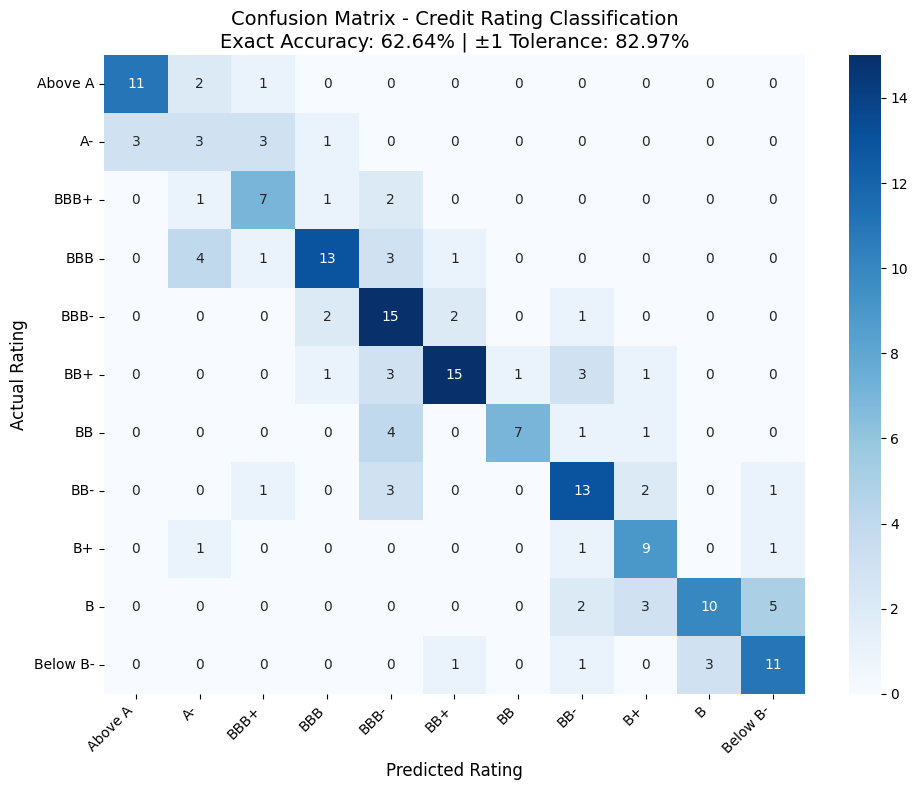


PER-CLASS METRICS

Above A:
  Precision: 0.7857
  Recall: 0.7857
  F1-Score: 0.7857
  Support: 14

A-:
  Precision: 0.2727
  Recall: 0.3000
  F1-Score: 0.2857
  Support: 10

BBB+:
  Precision: 0.5385
  Recall: 0.6364
  F1-Score: 0.5833
  Support: 11

BBB:
  Precision: 0.7222
  Recall: 0.5909
  F1-Score: 0.6500
  Support: 22

BBB-:
  Precision: 0.5000
  Recall: 0.7500
  F1-Score: 0.6000
  Support: 20

BB+:
  Precision: 0.7895
  Recall: 0.6250
  F1-Score: 0.6977
  Support: 24

BB:
  Precision: 0.8750
  Recall: 0.5385
  F1-Score: 0.6667
  Support: 13

BB-:
  Precision: 0.5909
  Recall: 0.6500
  F1-Score: 0.6190
  Support: 20

B+:
  Precision: 0.5625
  Recall: 0.7500
  F1-Score: 0.6429
  Support: 12

B:
  Precision: 0.7692
  Recall: 0.5000
  F1-Score: 0.6061
  Support: 20

Below B-:
  Precision: 0.6111
  Recall: 0.6875
  F1-Score: 0.6471
  Support: 16


In [16]:
# Plot Confusion Matrix with correct rating order
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Rating', fontsize=12)
plt.ylabel('Actual Rating', fontsize=12)
plt.title(f'Confusion Matrix - Credit Rating Classification\nExact Accuracy: {exact_accuracy*100:.2f}% | ±1 Tolerance: {tolerance_accuracy*100:.2f}%', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Per-class metrics
print("\n" + "=" * 60)
print("PER-CLASS METRICS")
print("=" * 60)

for i, label in enumerate(class_labels):
    tp = conf_matrix[i, i]
    fp = np.sum(conf_matrix[:, i]) - tp
    fn = np.sum(conf_matrix[i, :]) - tp
    support = np.sum(conf_matrix[i, :])
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"\n{label}:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  Support: {support}")